# Telcom Customer Churn Prediction - Exploratory Data Analysis

This notebook provides a comprehensive exploratory data analysis and data preparation for the telcom customer churn prediction project.

## Project Overview
- **Dataset**: Telcom Customer Churn Dataset
- **Objective**: Analyze customer behavior patterns and prepare data for churn prediction modeling
- **Target Variable**: Churn (Yes/No)

## Notebook Structure
1. Data Loading and Initial Inspection
2. Data Quality Analysis
3. Exploratory Data Analysis - Target Variable
4. Exploratory Data Analysis - Numeric Features
5. Exploratory Data Analysis - Categorical Features
6. Data Cleaning and Preprocessing
7. Feature Engineering
8. Data Encoding
9. Final Dataset Preparation

## 1. Data Loading and Initial Inspection

Let's start by importing the necessary libraries and loading the dataset.

In [102]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [103]:
# Load the dataset
df = pd.read_csv('Telco_Customer_Churn.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [104]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
# Dataset information
df.info()
print("Data Types:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [106]:
# Descriptive statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### **Initial Data Inspection Insights**

**Key Findings from Initial Analysis:**
- **Dataset Size**: 7,043 customers with 21 features
- **Data Quality**: All columns have complete records (no null values initially)
- **Feature Mix**: 18 categorical features (object type), 2 numeric integers, 1 float
- **Notable Issue**: `TotalCharges` is stored as object (text) instead of numeric - this needs investigation

**Customer Demographics Summary:**
- **Senior Citizens**: ~16.2% of customers are senior citizens
- **Tenure**: Average customer tenure is ~32 months (ranging from 0-72 months)
- **Monthly Charges**: Average $64.76/month (ranging from $18.25-$118.75)
- **Tenure Distribution**: Median tenure is 29 months, indicating a fairly balanced customer base

**Next Steps**: Need to investigate the TotalCharges column and check for data quality issues.

## 2. Data Quality Analysis

Let's examine the data quality by checking for duplicates, missing values, and data inconsistencies.

In [107]:
# Check for duplicate records
print(f"Total rows: {len(df)}")
print(f"Unique rows: {len(df.drop_duplicates())}")
print(f"Duplicate rows: {len(df) - len(df.drop_duplicates())}")

# Check for duplicate customerIDs
duplicate_customers = df['customerID'].duplicated().sum()
print(f"Duplicate customer IDs: {duplicate_customers}")

Total rows: 7043
Unique rows: 7043
Duplicate rows: 0
Duplicate customer IDs: 0


In [108]:
# Check TotalCharges for data quality issues (spaces instead of numbers)
print(f"TotalCharges data type: {df['TotalCharges'].dtype}")
print(f"Sample TotalCharges values:")
print(df['TotalCharges'].head(10))

# Check for non-numeric values in TotalCharges
non_numeric_total_charges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(f"\nRows with non-numeric TotalCharges: {len(non_numeric_total_charges)}")

if len(non_numeric_total_charges) > 0:
    print("Non-numeric TotalCharges values:")
    print(non_numeric_total_charges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

TotalCharges data type: object
Sample TotalCharges values:
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

Rows with non-numeric TotalCharges: 11
Non-numeric TotalCharges values:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


### **Data Quality Analysis Insights**

- **No Duplicate Records**
- **No Missing Values**

**Critical Data Quality Issue Identified:**
- **TotalCharges Problem**: 11 customers have **empty space characters** instead of numeric values
- **Pattern Identified**: All problematic records have `tenure = 0` (new customers)
- **Root Cause**: New customers (0 tenure) should have $0 total charges, but data entry used spaces

**Impact Assessment:**
- **Affected Records**: 11 out of 7,043 (0.16% of dataset)
- **Business Logic**: New customers (0 tenure) logically should have $0 total charges
- **Data Type Issue**: TotalCharges stored as text instead of numeric prevents mathematical operations

**Cleaning Strategy:**
1. Convert TotalCharges to numeric format
2. Replace space characters with 0 for new customers
3. Validate that tenure=0 customers have appropriate total charges

## 3. Exploratory Data Analysis - Target Variable

Let's analyze the distribution of our target variable (Churn) to understand the class balance.

Absolute counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentages:
No: 73.46%
Yes: 26.54%


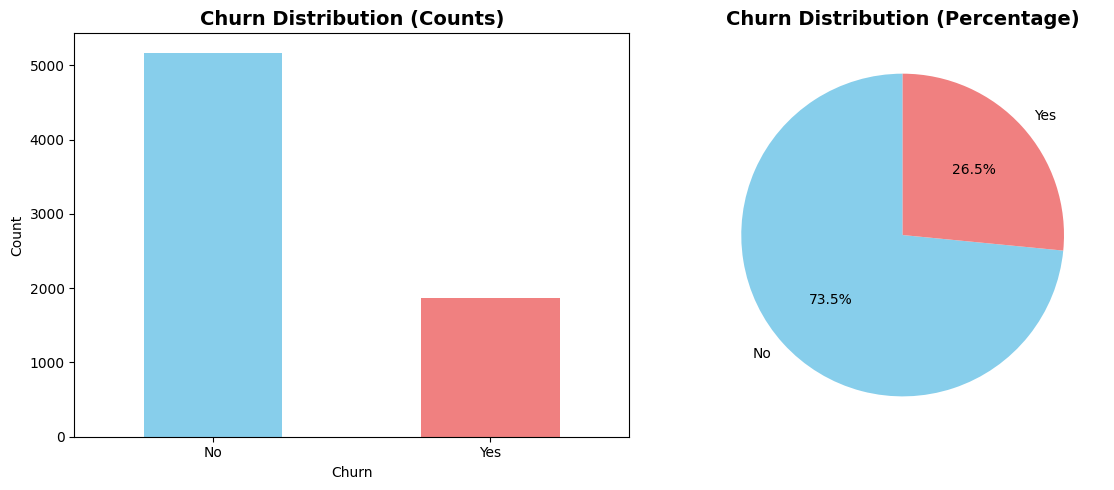

In [109]:
# Target variable analysis
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Absolute counts:")
print(churn_counts)
print("\nPercentages:")
for label, pct in churn_percentage.items():
    print(f"{label}: {pct:.2f}%")

# Visualize churn distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
churn_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Churn Distribution (Counts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
ax2.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'], startangle=90)
ax2.set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### **Target Variable Analysis Insights**

**Churn Distribution Summary:**
- **Retention Rate**: 73.46% of customers stayed (5,174 customers)
- **Churn Rate**: 26.54% of customers left (1,869 customers)
- **Class Ratio**: Approximately 3:1 ratio (retained vs churned)

**Business Implications:**
- **Moderate Churn Rate**: 26.54% is significant enough to warrant attention and intervention
- **Balanced Dataset**: Not severely imbalanced - good for machine learning models
- **Business Impact**: With ~1,869 customers churning, there's substantial revenue at risk

**Modeling Considerations:**
-  **Not Severely Imbalanced**: 26.54% positive class is reasonable for most ML algorithms
-  **Sufficient Samples**: Both classes have enough samples for robust model training
-  **Baseline Accuracy**: A naive model predicting "No Churn" would achieve 73.46% accuracy

**Key Questions for Further Analysis:**
- What factors drive the 26.54% churn rate?
- Can we identify high-risk customer segments?
- What interventions might reduce churn?

## 4. Exploratory Data Analysis - Numeric Features

Let's analyze the numeric features and their relationship with churn.

In [110]:
# First, let's clean TotalCharges for analysis
df_clean = df.copy()
# Convert TotalCharges to numeric, replacing non-numeric values with NaN
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Identify numeric columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

print("Numeric Features Summary:")
for col in numeric_columns:
    print(f"\n{col}:")
    print(f"  Min: {df_clean[col].min()}")
    print(f"  Max: {df_clean[col].max()}")
    print(f"  Mean: {df_clean[col].mean():.2f}")
    print(f"  Std: {df_clean[col].std():.2f}")
    print(f"  Missing: {df_clean[col].isnull().sum()}")

Numeric Features Summary:

tenure:
  Min: 0
  Max: 72
  Mean: 32.37
  Std: 24.56
  Missing: 0

MonthlyCharges:
  Min: 18.25
  Max: 118.75
  Mean: 64.76
  Std: 30.09
  Missing: 0

TotalCharges:
  Min: 18.8
  Max: 8684.8
  Mean: 2283.30
  Std: 2266.77
  Missing: 11

SeniorCitizen:
  Min: 0
  Max: 1
  Mean: 0.16
  Std: 0.37
  Missing: 0


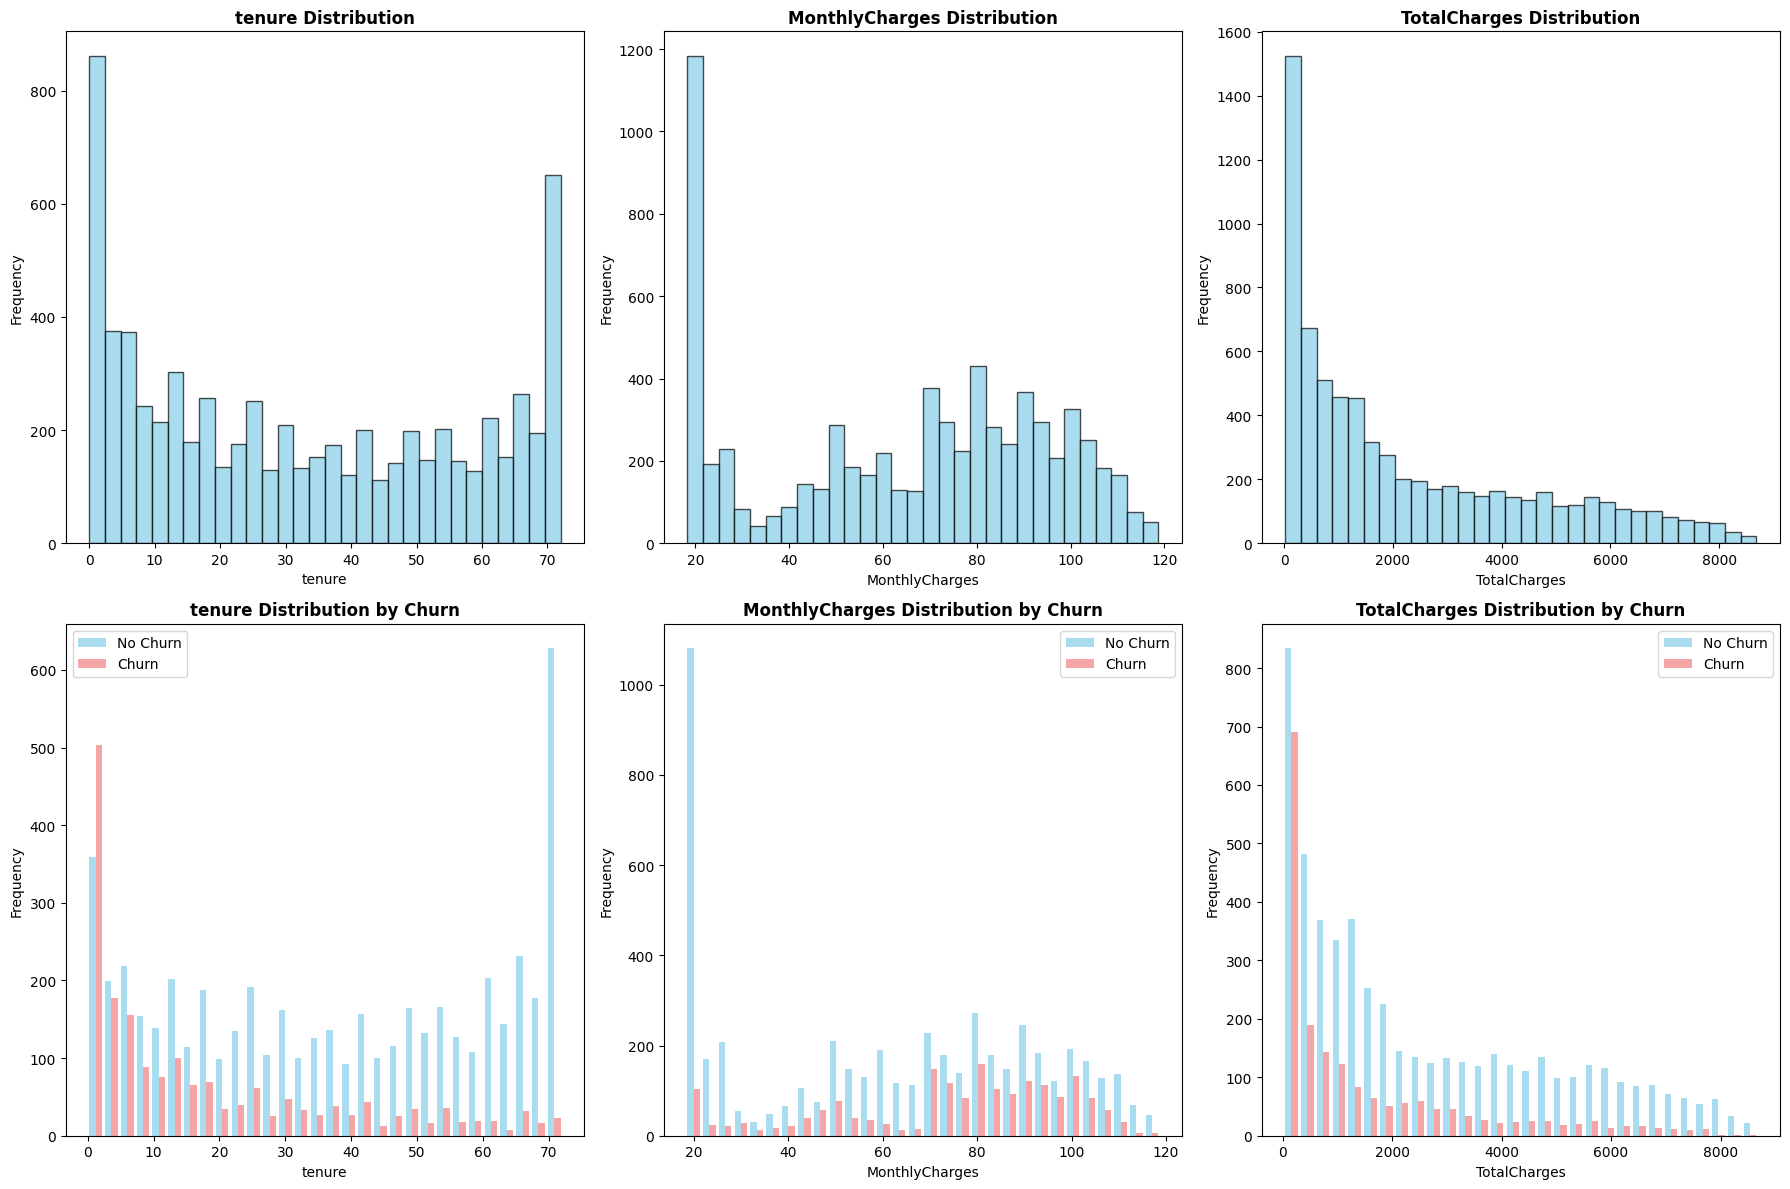

In [111]:
# Distribution plots for numeric features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    # Overall distribution
    axes[i].hist(df_clean[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Distribution by churn
    axes[i+3].hist([df_clean[df_clean['Churn']=='No'][col].dropna(), 
                    df_clean[df_clean['Churn']=='Yes'][col].dropna()], 
                   bins=30, alpha=0.7, label=['No Churn', 'Churn'], 
                   color=['skyblue', 'lightcoral'])
    axes[i+3].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')
    axes[i+3].set_xlabel(col)
    axes[i+3].set_ylabel('Frequency')
    axes[i+3].legend()

plt.tight_layout()
plt.show()

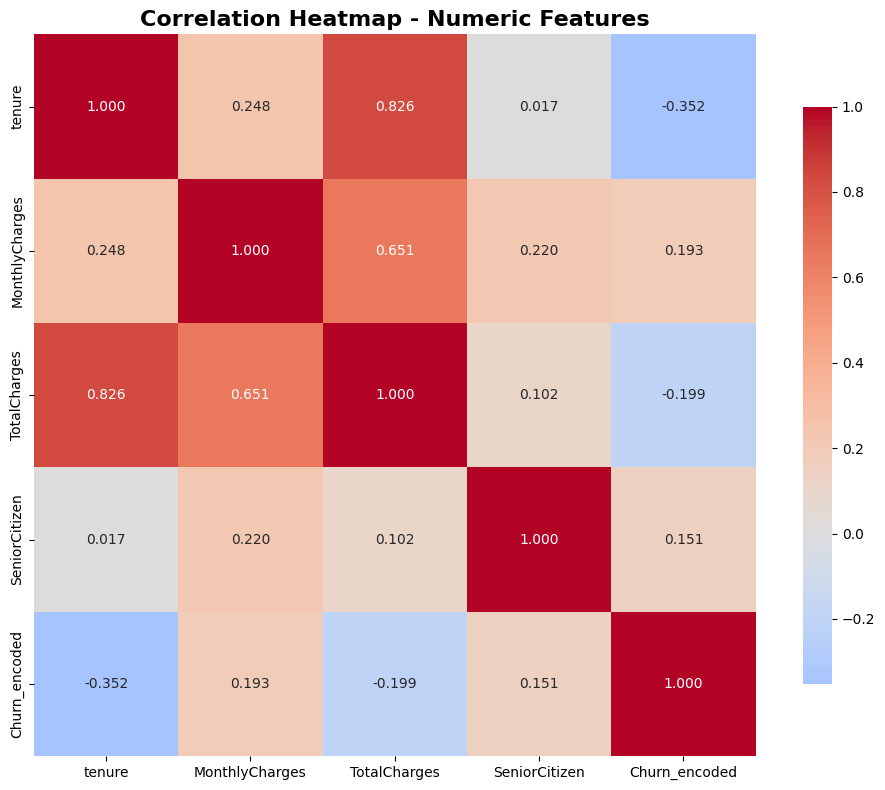

Correlation with Churn:
tenure: -0.352
TotalCharges: -0.199
MonthlyCharges: 0.193
SeniorCitizen: 0.151


In [112]:
# Correlation heatmap
# Create a subset with numeric columns and encoded target
df_numeric = df_clean[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].copy()
df_numeric['Churn_encoded'] = (df_clean['Churn'] == 'Yes').astype(int)

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation with Churn:")
churn_corr = correlation_matrix['Churn_encoded'].drop('Churn_encoded').sort_values(key=abs, ascending=False)
for feature, corr in churn_corr.items():
    print(f"{feature}: {corr:.3f}")

### **Numeric Features Analysis Insights**

**Key Distribution Patterns:**
- **Tenure**: Bimodal distribution with peaks at 0-2 months (new customers) and 65-72 months (loyal customers)
- **Monthly Charges**: Multimodal distribution spanning $18-$119, indicating different service tiers
- **Total Charges**: Right-skewed distribution, typical of cumulative spending patterns

**Critical Churn Correlations:**

1. **Tenure (-0.352)**:  **Strong negative correlation** - longer tenure = lower churn risk
2. **Total Charges (-0.199)**:  **Moderate negative correlation** - higher lifetime value = lower churn  
3. **Monthly Charges (+0.193)**:  **Moderate positive correlation** - higher monthly bills = higher churn risk
4. **Senior Citizen (+0.151)**:  **Weak positive correlation** - seniors slightly more likely to churn

**Key Business Insights:**

**High-Risk Patterns:**
- **New Customers**: Clear spike in churn for 0-5 month tenure customers
- **High Monthly Bills**: Customers paying more monthly are more prone to churn
- **Senior Citizens**: Slightly elevated churn risk (15.1% correlation)

**Retention Patterns:**
- **Long Tenure**: Customers with 60+ months show excellent retention
- **Higher Total Charges**: Customers with more lifetime value tend to stay
- **Sweet Spot**: Mid-range monthly charges (~$35-70) show better retention

**Feature Relationships:**
- **Strong Tenure-TotalCharges Correlation (0.826)**: As expected, longer customers accumulate more charges
- **Moderate MonthlyCharges-TotalCharges Correlation (0.651)**: Higher monthly spenders accumulate more over time

## 5. Exploratory Data Analysis - Categorical Features

Now let's analyze categorical features and their relationship with churn.

In [113]:
# Identify categorical columns (excluding customerID and Churn)
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                      'PaperlessBilling', 'PaymentMethod']

print("Categorical Features Analysis:")
for col in categorical_columns:
    print(f"\n")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

Categorical Features Analysis:


gender
Male      3555
Female    3488
Name: count, dtype: int64
Unique values: 2


Partner
No     3641
Yes    3402
Name: count, dtype: int64
Unique values: 2


Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Unique values: 2


PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Unique values: 2


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Unique values: 3


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Unique values: 3


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
Unique values: 3


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
Unique values: 3


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name

In [114]:
# Calculate churn rates for categorical features
def calculate_churn_rate(df, column):
    """Calculate churn rate for each category in a column"""
    return df.groupby(column)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)

print("Churn Rates by Categorical Features:")

churn_rates = {}
for col in categorical_columns:
    churn_rate = calculate_churn_rate(df, col)
    churn_rates[col] = churn_rate
    print(f"\n{col}:")
    for category, rate in churn_rate.items():
        print(f"  {category}: {rate:.2f}%")

Churn Rates by Categorical Features:

gender:
  Female: 26.92%
  Male: 26.16%

Partner:
  No: 32.96%
  Yes: 19.66%

Dependents:
  No: 31.28%
  Yes: 15.45%

PhoneService:
  No: 24.93%
  Yes: 26.71%

MultipleLines:
  No: 25.04%
  No phone service: 24.93%
  Yes: 28.61%

InternetService:
  DSL: 18.96%
  Fiber optic: 41.89%
  No: 7.40%

OnlineSecurity:
  No: 41.77%
  No internet service: 7.40%
  Yes: 14.61%

OnlineBackup:
  No: 39.93%
  No internet service: 7.40%
  Yes: 21.53%

DeviceProtection:
  No: 39.13%
  No internet service: 7.40%
  Yes: 22.50%

TechSupport:
  No: 41.64%
  No internet service: 7.40%
  Yes: 15.17%

StreamingTV:
  No: 33.52%
  No internet service: 7.40%
  Yes: 30.07%

StreamingMovies:
  No: 33.68%
  No internet service: 7.40%
  Yes: 29.94%

Contract:
  Month-to-month: 42.71%
  One year: 11.27%
  Two year: 2.83%

PaperlessBilling:
  No: 16.33%
  Yes: 33.57%

PaymentMethod:
  Bank transfer (automatic): 16.71%
  Credit card (automatic): 15.24%
  Electronic check: 45.29%
  

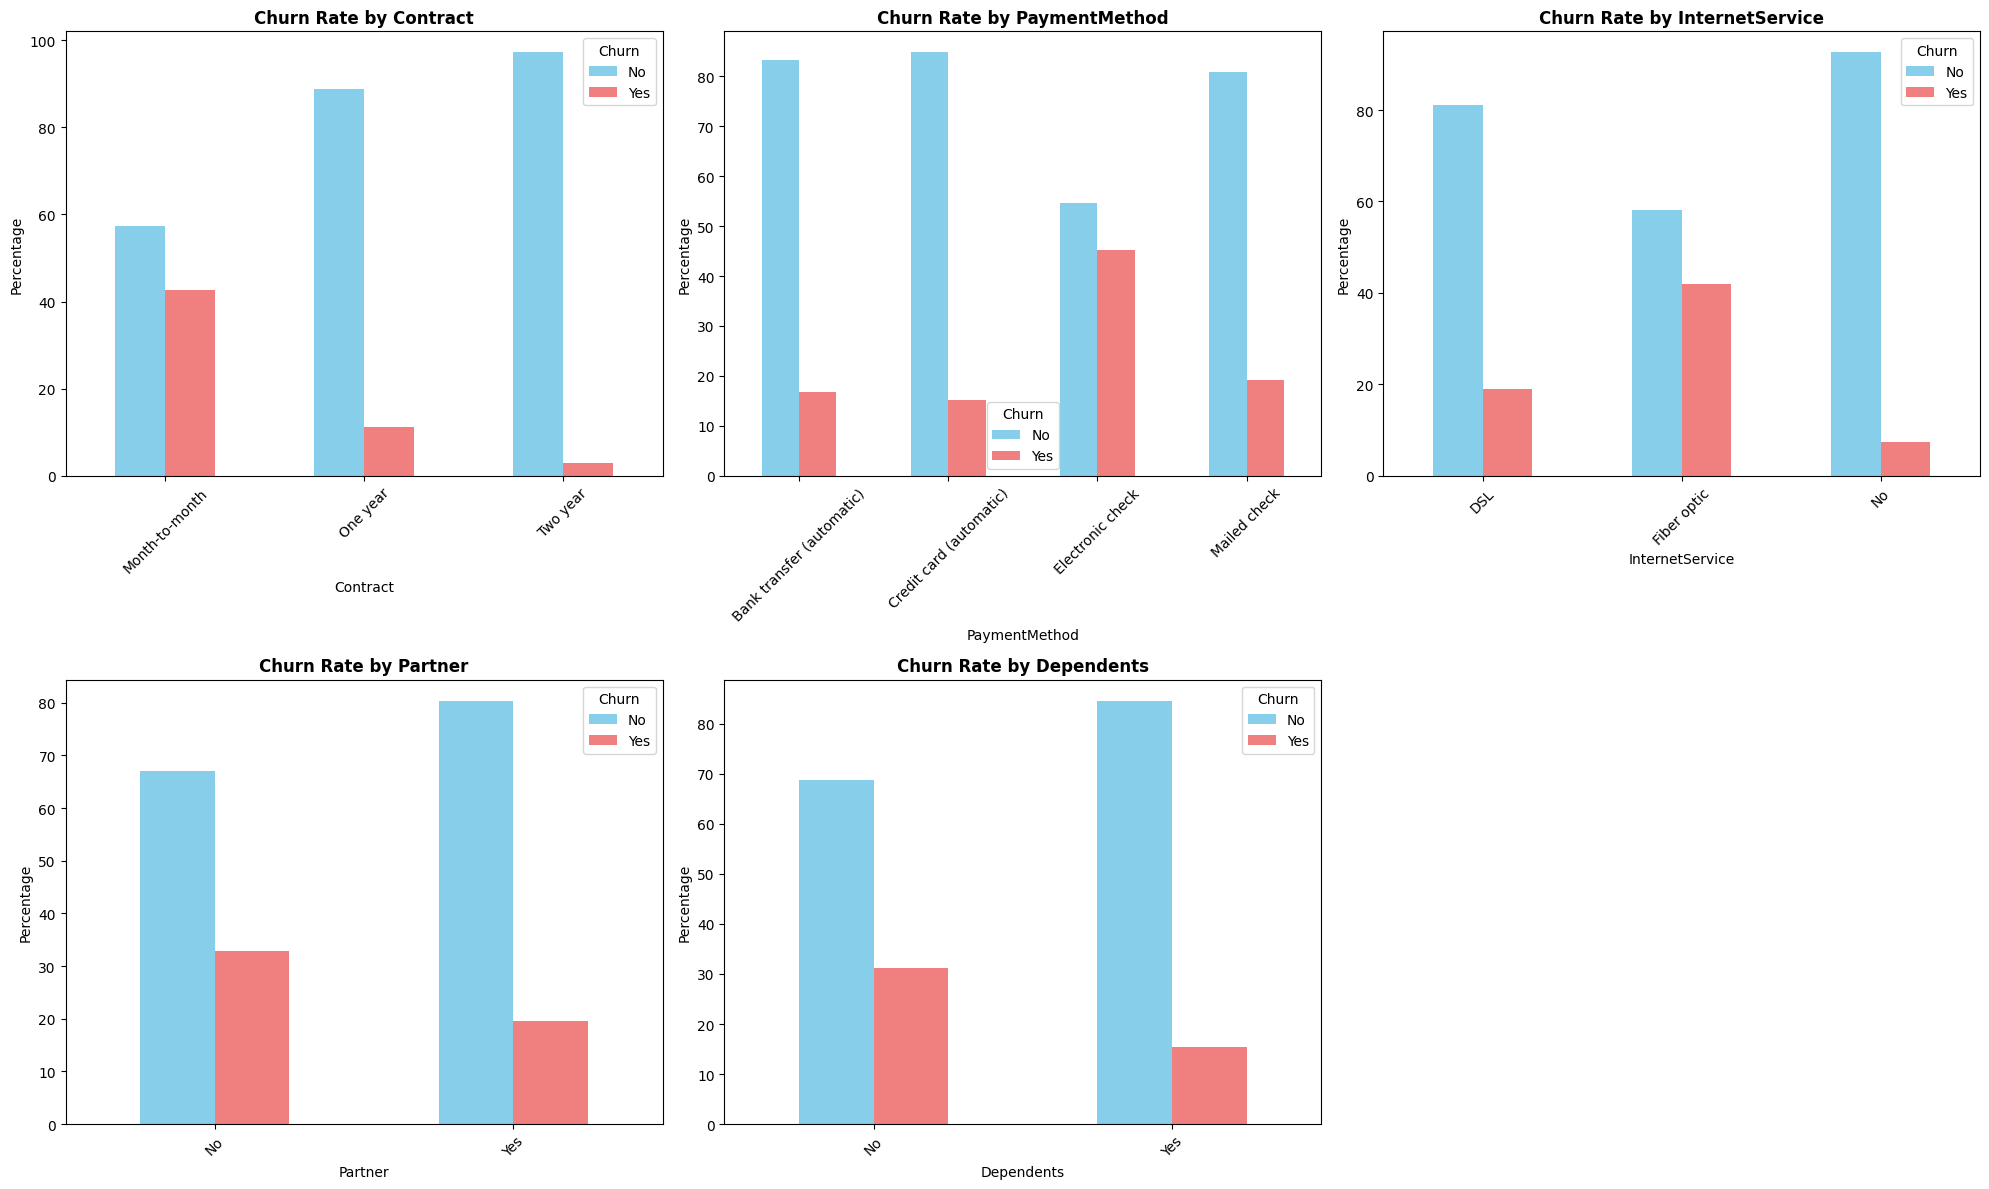

In [115]:
# Visualize churn rates for key categorical features
key_features = ['Contract', 'PaymentMethod', 'InternetService', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    # Create cross-tabulation
    ct = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Plot
    ct.plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral'])
    axes[i].set_title(f'Churn Rate by {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Churn')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the empty subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

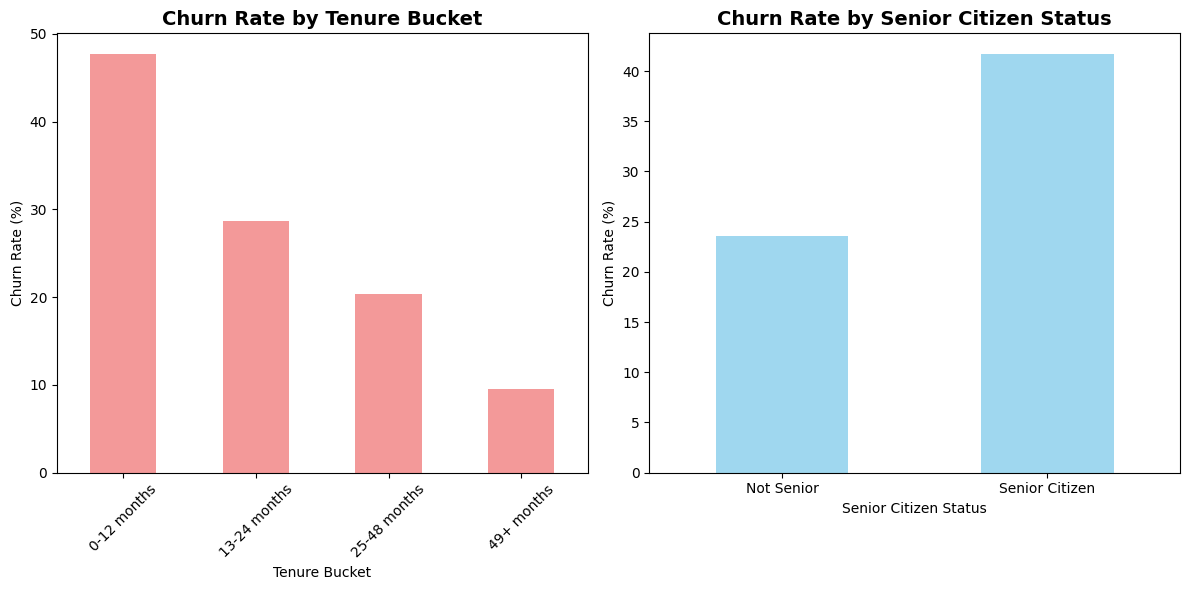

Tenure Bucket Churn Rates:
0-12 months: 47.68%
13-24 months: 28.71%
25-48 months: 20.39%
49+ months: 9.51%

Senior Citizen Churn Rates:
Not Senior: 23.61%
Senior Citizen: 41.68%


In [116]:
# Analyze tenure patterns
# Create tenure buckets for analysis
df_tenure = df.copy()
df_tenure['TenureBucket'] = pd.cut(df_tenure['tenure'], 
                                   bins=[0, 12, 24, 48, float('inf')], 
                                   labels=['0-12 months', '13-24 months', '25-48 months', '49+ months'])

# Tenure bucket analysis
tenure_churn = df_tenure.groupby('TenureBucket')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
tenure_churn.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Churn Rate by Tenure Bucket', fontsize=14, fontweight='bold')
plt.xlabel('Tenure Bucket')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

# Senior citizen analysis
plt.subplot(1, 2, 2)
senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
senior_labels = ['Not Senior', 'Senior Citizen']
senior_churn.index = senior_labels
senior_churn.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Churn Rate by Senior Citizen Status', fontsize=14, fontweight='bold')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("Tenure Bucket Churn Rates:")
for bucket, rate in tenure_churn.items():
    print(f"{bucket}: {rate:.2f}%")
    
print(f"\nSenior Citizen Churn Rates:")
for i, rate in enumerate(senior_churn):
    print(f"{senior_labels[i]}: {rate:.2f}%")

### **Categorical Features Analysis Insights**

###  **Highest Risk Factors**

### **1. Contract Type - Most Predictive Factor**
- **Month-to-month: 42.71% churn**  **CRITICAL RISK**
- **One year: 11.27% churn**  Moderate risk
- **Two year: 2.83% churn**  Low risk
- **Business Impact**: Month-to-month customers are **15x more likely** to churn than two-year contract customers

### **2. Payment Method - Strong Risk Indicator**
- **Electronic check: 45.29% churn** **CRITICAL RISK**  
- **Mailed check: 19.11% churn**  Moderate risk
- **Automatic payments: 15-17% churn**  Low risk

### **3. Internet Service Type - Technology Risk**
- **Fiber optic: 41.89% churn** **CRITICAL RISK**
- **DSL: 18.96% churn** Moderate risk  
- **No internet: 7.40% churn** Low risk

### **Customer Life Cycle Patterns**

### **Tenure Risk Curve - Clear Vulnerability Window**
- **0-12 months: 47.68% churn**  **CRITICAL - New Customer Risk**
- **13-24 months: 28.71% churn**  **Early relationship risk**
- **25-48 months: 20.39% churn**  Stabilizing
- **49+ months: 9.51% churn**  **Loyal customer base**

### **Demographics & Family Status**
- **Senior Citizens: 41.68% vs 23.61%** (76% higher churn rate)
- **No Partner: 32.96% vs 19.66%** (68% higher churn rate)  
- **No Dependents: 31.28% vs 15.45%** (102% higher churn rate)

### **Security & Support Services Impact**

### **Value-Added Services Protection Effect**
- **Customers WITHOUT security/support services: 40-42% churn**
- **Customers WITH security/support services: 14-22% churn**
- **Protection Factor**: Security services reduce churn by ~60%

### **Service Adoption Patterns**
- **OnlineSecurity**: 41.77% → 14.61% (65% reduction)
- **TechSupport**: 41.64% → 15.17% (64% reduction)
- **OnlineBackup**: 39.93% → 21.53% (46% reduction)

### **Strategic Business Insights**

### **Priority Intervention Targets**
1. **New customers (0-12 months)** - 47.68% at risk
2. **Fiber optic customers** - 41.89% churn rate
3. **Electronic check users** - 45.29% churn rate
4. **Month-to-month contracts** - 42.71% churn rate
5. **Senior citizens** - 41.68% churn rate

### **Retention Success Factors**
- **Long-term contracts** dramatically improve retention
- **Automatic payment methods** reduce churn by 60%+
- **Security and support services** are highly protective
- **Family customers** (with partners/dependents) show much better retention

### **Revenue Optimization Opportunities**
- **Convert month-to-month to annual contracts** -> Perhaps give discount to year contracts
- **Promote automatic payment methods**
- **Bundle security services for fiber customers**
- **Develop senior-citizen specific retention programs** -> Perhaps checkins with the citizens, encourage their service usage. 

## 6. Data Cleaning and Preprocessing

Now let's clean the data and handle any inconsistencies identified during our analysis.

In [117]:
# Create a copy for cleaning
df_cleaned = df.copy()

# Step 1: Handle TotalCharges conversion
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

# Check for missing values after conversion
total_charges_missing = df_cleaned['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges after conversion: {total_charges_missing}")

# Step 2: Handle missing TotalCharges values
if total_charges_missing > 0:
    # For customers with 0 tenure, TotalCharges should be 0 
    zero_tenure_mask = (df_cleaned['tenure'] == 0) & (df_cleaned['TotalCharges'].isnull())
    df_cleaned.loc[zero_tenure_mask, 'TotalCharges'] = 0
    
    print(f"Set TotalCharges to 0 for {zero_tenure_mask.sum()} customers with 0 tenure")
    
    # For remaining missing values, impute with median of same tenure group
    remaining_missing = df_cleaned['TotalCharges'].isnull().sum()
    
print(f"3. Final missing values in TotalCharges: {df_cleaned['TotalCharges'].isnull().sum()}")

Missing values in TotalCharges after conversion: 11
Set TotalCharges to 0 for 11 customers with 0 tenure
3. Final missing values in TotalCharges: 0


In [118]:
# Step 3: Separate customerID for tracking
print("4. Separating customerID for tracking...")
customer_ids = df_cleaned['customerID'].copy()
df_modeling = df_cleaned.drop('customerID', axis=1)
print(f"   Separated {len(customer_ids)} customer IDs")

print(f"\nCleaned dataset shape: {df_modeling.shape}")
print(f"Columns in modeling dataset: {list(df_modeling.columns)}")

4. Separating customerID for tracking...
   Separated 7043 customer IDs

Cleaned dataset shape: (7043, 20)
Columns in modeling dataset: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## 7. Feature Engineering

Let's create new features that might help improve our model's performance.

In [119]:
# Feature Engineering

# 1. Create tenure buckets
df_modeling['TenureBucket'] = pd.cut(df_modeling['tenure'], 
                                     bins=[0, 12, 24, 48, float('inf')], 
                                     labels=['0-12_months', '13-24_months', '25-48_months', '49+_months'])

# 2. Calculate average monthly charge (MonthlyCharges / TotalCharges * tenure) - charge consistency
# Avoid division by zero
df_modeling['ChargeRatio'] = np.where(df_modeling['TotalCharges'] > 0, 
                                      df_modeling['MonthlyCharges'] * df_modeling['tenure'] / df_modeling['TotalCharges'],
                                      1.0)

# 3. Create service count feature
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count 'Yes' values for each service
df_modeling['ServiceCount'] = 0
for col in service_columns:
    df_modeling['ServiceCount'] += (df_modeling[col] == 'Yes').astype(int)

# 4. Create total services available feature
df_modeling['HasPhoneService'] = (df_modeling['PhoneService'] == 'Yes').astype(int)
df_modeling['HasInternetService'] = (df_modeling['InternetService'] != 'No').astype(int)

print(f"   Created TenureBucket with categories: {df_modeling['TenureBucket'].cat.categories.tolist()}")
print(f"   ChargeRatio range: {df_modeling['ChargeRatio'].min():.3f} - {df_modeling['ChargeRatio'].max():.3f}")
print(f"   ServiceCount range: {df_modeling['ServiceCount'].min()} - {df_modeling['ServiceCount'].max()}")
print(f"   New features added: TenureBucket, ChargeRatio, ServiceCount, HasPhoneService, HasInternetService")

   Created TenureBucket with categories: ['0-12_months', '13-24_months', '25-48_months', '49+_months']
   ChargeRatio range: 0.636 - 1.451
   ServiceCount range: 0 - 8
   New features added: TenureBucket, ChargeRatio, ServiceCount, HasPhoneService, HasInternetService


**New Features Created:**
- TenureBucket: 4 lifecycle stages (0-12, 13-24, 25-48, 49+ months)
- ChargeRatio: Range 0.636-1.451 for billing pattern analysis
- ServiceCount: 0-8 services per customer
- Service availability flags for phone and internet

## 8. Data Encoding

Now let's encode all categorical variables for machine learning models.

In [120]:
# Data Encoding
df_encoded = df_modeling.copy()

# 1. Label encode the target variable
df_encoded['Churn'] = (df_encoded['Churn'] == 'Yes').astype(int)
print(f"   Churn encoded: No=0, Yes=1")

# 2. Binary encode Yes/No features
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for feature in binary_features:
    if feature == 'gender':
        df_encoded[feature] = (df_encoded[feature] == 'Male').astype(int)
        print(f"   {feature}: Female=0, Male=1")
    else:
        df_encoded[feature] = (df_encoded[feature] == 'Yes').astype(int)
        print(f"   {feature}: No=0, Yes=1")

# 3. Handle MultipleLines (has 'No phone service' option)
df_encoded['MultipleLines_Yes'] = (df_encoded['MultipleLines'] == 'Yes').astype(int)
df_encoded['MultipleLines_No'] = (df_encoded['MultipleLines'] == 'No').astype(int)
# 'No phone service' becomes 0 for both
df_encoded = df_encoded.drop('MultipleLines', axis=1)
print("   Created: MultipleLines_Yes, MultipleLines_No")

   Churn encoded: No=0, Yes=1
   gender: Female=0, Male=1
   Partner: No=0, Yes=1
   Dependents: No=0, Yes=1
   PhoneService: No=0, Yes=1
   PaperlessBilling: No=0, Yes=1
   Created: MultipleLines_Yes, MultipleLines_No


In [121]:
# 4. Handle internet-dependent services
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies']

for service in internet_services:
    df_encoded[f'{service}_Yes'] = (df_encoded[service] == 'Yes').astype(int)
    df_encoded[f'{service}_No'] = (df_encoded[service] == 'No').astype(int)
    # 'No internet service' becomes 0 for both
    df_encoded = df_encoded.drop(service, axis=1)
    print(f"   Created: {service}_Yes, {service}_No")

# 5. One-hot encode multi-class categorical features
multi_class_features = ['InternetService', 'Contract', 'PaymentMethod', 'TenureBucket']

for feature in multi_class_features:
    # Get unique values
    unique_values = df_encoded[feature].unique()
    print(f"     Categories: {unique_values}")
    
    # Create dummy variables
    dummies = pd.get_dummies(df_encoded[feature], prefix=feature, drop_first=True)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    df_encoded = df_encoded.drop(feature, axis=1)
    print(f"     Created columns: {list(dummies.columns)}")

print(f"\nFinal encoded dataset shape: {df_encoded.shape}")
print(f"Total features: {df_encoded.shape[1] - 1} (excluding target)")  # -1 for target variable

   Created: OnlineSecurity_Yes, OnlineSecurity_No
   Created: OnlineBackup_Yes, OnlineBackup_No
   Created: DeviceProtection_Yes, DeviceProtection_No
   Created: TechSupport_Yes, TechSupport_No
   Created: StreamingTV_Yes, StreamingTV_No
   Created: StreamingMovies_Yes, StreamingMovies_No
     Categories: ['DSL' 'Fiber optic' 'No']
     Created columns: ['InternetService_Fiber optic', 'InternetService_No']
     Categories: ['Month-to-month' 'One year' 'Two year']
     Created columns: ['Contract_One year', 'Contract_Two year']
     Categories: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
     Created columns: ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
     Categories: ['0-12_months', '25-48_months', '13-24_months', '49+_months', NaN]
Categories (4, object): ['0-12_months' < '13-24_months' < '25-48_months' < '49+_months']
     Created columns: ['TenureBucket_13-24_months', 'Tenur

**Encoding Summary:**
- Target variable: Binary encoded for classification
- 5 binary features: Standard 0/1 encoding
- 6 internet services: Handled 'No service' categories appropriately  
- 4 multi-class features: One-hot encoded with drop_first=True
- Final shape: 7,043 customers × 37 features

## 9. Final Dataset Preparation

Let's finalize our dataset and save it for modeling.

In [122]:
# Final dataset preparation
# Display final dataset information
print(f"Final dataset shape: {df_encoded.shape}")
print(f"Features: {df_encoded.shape[1] - 1}")
print(f"Samples: {df_encoded.shape[0]}")
print(f"\nTarget distribution after encoding:")
print(df_encoded['Churn'].value_counts())

# Display all column names
print(f"\nAll columns in final dataset:")
all_columns = list(df_encoded.columns)
for i, col in enumerate(all_columns, 1):
    print(f"{i:2d}. {col}")

# Check for any remaining missing values
missing_final = df_encoded.isnull().sum().sum()
print(f"\nTotal missing values in final dataset: {missing_final}")

# Display data types
print(f"\nData types summary:")
print(df_encoded.dtypes.value_counts())

Final dataset shape: (7043, 38)
Features: 37
Samples: 7043

Target distribution after encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64

All columns in final dataset:
 1. gender
 2. SeniorCitizen
 3. Partner
 4. Dependents
 5. tenure
 6. PhoneService
 7. PaperlessBilling
 8. MonthlyCharges
 9. TotalCharges
10. Churn
11. ChargeRatio
12. ServiceCount
13. HasPhoneService
14. HasInternetService
15. MultipleLines_Yes
16. MultipleLines_No
17. OnlineSecurity_Yes
18. OnlineSecurity_No
19. OnlineBackup_Yes
20. OnlineBackup_No
21. DeviceProtection_Yes
22. DeviceProtection_No
23. TechSupport_Yes
24. TechSupport_No
25. StreamingTV_Yes
26. StreamingTV_No
27. StreamingMovies_Yes
28. StreamingMovies_No
29. InternetService_Fiber optic
30. InternetService_No
31. Contract_One year
32. Contract_Two year
33. PaymentMethod_Credit card (automatic)
34. PaymentMethod_Electronic check
35. PaymentMethod_Mailed check
36. TenureBucket_13-24_months
37. TenureBucket_25-48_months
38. TenureBucket_49+_mon

In [123]:
# Save the cleaned dataset
df_encoded.to_csv('cleaned_telcom_data.csv', index=False)
print("Saved as 'cleaned_telcom_data.csv'")

# Save customer IDs mapping for tracking
customer_mapping = pd.DataFrame({
    'Index': range(len(customer_ids)),
    'CustomerID': customer_ids.values
})
customer_mapping.to_csv('customer_id_mapping.csv', index=False)
print("Saved customer ID mapping as 'customer_id_mapping.csv'")



Saved as 'cleaned_telcom_data.csv'
Saved customer ID mapping as 'customer_id_mapping.csv'


**Final Deliverables:**
- cleaned_telcom_data.csv: ML-ready dataset
- customer_id_mapping.csv: Customer tracking file
- Complete data lineage documentation
- 37 engineered features ready for model training

## **Executive Summary: Telcom Churn Analysis**

### **Key Business Metrics**
- **Total Customers Analyzed**: 7,043
- **Overall Churn Rate**: 26.54% (1,869 customers lost)
- **Data Quality**: 99.84% clean (only 11 records needed correction)
- **Revenue at Risk**: Significant, with high-value fiber customers at highest risk



### **Critical Risk Factors (Immediate Action Required)**

#### **1. Ultra-High Risk Segments (40%+ Churn Rate)**
- **New Customers (0-12 months)**: 47.68% churn
- **Electronic Check Users**: 45.29% churn  
- **Month-to-Month Contracts**: 42.71% churn
- **Fiber Optic Customers**: 41.89% churn
- **Senior Citizens**: 41.68% churn

#### **2. High Risk Segments (25-40% Churn Rate)**
- **Single Customers (no partner)**: 32.96% churn
- **No Dependents**: 31.28% churn
- **Without Security Services**: 40%+ churn

---

### **Revenue Protection Strategies**

#### **Priority 1: New Customer Onboarding (47.68% at risk)**
- **Implement 90-day success program** for customers 0-12 months
- **Proactive support outreach** at 30, 60, 90 days
- **Early contract conversion incentives**

#### **Priority 2: Payment Method Optimization (45.29% at risk)**
- **Incentivize automatic payment adoption** (reduces churn by 60%+)
- **Special offers for electronic check users** to switch methods
- **Automated payment setup during onboarding**

#### **Priority 3: Contract Conversion (42.71% at risk)**
- **Month-to-month customers are 15x more likely to churn**
- **Annual contract incentives** (reduces churn from 42.7% to 11.3%)
- **Two-year contract promotions** (reduces churn to 2.8%)

#### **Priority 4: Fiber Customer Retention (41.89% at risk)**
- **Bundle security services** (reduces churn by 65%)
- **Premium support tier** for fiber customers
- **Service quality improvements** and proactive monitoring

---

### **Proven Retention Mechanisms**

#### **Most Effective Interventions**
1. **Long-term Contracts**: 15x churn reduction
2. **Automatic Payments**: 60%+ churn reduction  
3. **Security Services**: 65% churn reduction
4. **Technical Support**: 64% churn reduction
5. **Family Plans**: 68%+ churn reduction (partners/dependents)

#### **Customer Lifetime Value Optimization**
- **Target customers with 49+ months tenure** (only 9.51% churn)
- **Build pathway from new customer → loyal customer**
- **Focus on relationship building in first 24 months**

### **Data Science Model Readiness**

#### **Dataset Prepared For ML**
- **Clean Dataset**: 7,043 customers, 37 features
- **Balanced Target**: 26.54% churn rate (suitable for most algorithms)
- **Feature Engineering**: Tenure buckets, service counts, charge ratios
- **Proper Encoding**: All categorical variables encoded appropriately

#### **Key Predictive Features Identified**
1. **Tenure** (strongest negative predictor)
2. **Contract type** (strongest categorical predictor)  
3. **Payment method** (clear risk stratification)
4. **Internet service type** (technology-related risk)
5. **Security services** (protective effect)

